In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from helper import *

In [19]:
#####################################
#### helper functions ####
#####################################

def print_df_info(df):
    """
    Prints the shape of the DataFrame and its first few rows.
    """
    print("Data shape:", df.shape)
    print("Data head:")
    print(df.head())
    

def to_numeric(df, col):
    """
    change the col to numeric, replace "Not Available" to none.
    """
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce') if pd.notna(x) and x != 'Not Available' else None)

            
def summary(df, col):
    """
    run summary analysis on df, if df has boroughs run separate analysis for each stat
    """  
    # Convert col to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')   
    # Check if the Borough column exists in the DataFrame
    if 'Borough' in df.columns:
        # Replace NaN values in Borough column with "Not specified"
        df['Borough'].fillna('Not specified', inplace=True)
        # Group the data by borough and calculate summary statistics
        grouped_data = df.groupby('Borough')[col].agg(['count', 'mean', 'std', 'sum'])
        # Print the summary statistics for the entire dataset
        print(f"Summary statistics for {col}:")
        print(grouped_data)
        
        # Visualize the summary data by borough as a bar chart
        colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
        for stat in ['count', 'mean', 'std', 'sum']:
            ax = grouped_data[stat].plot(kind='bar', color=colors)
            ax.set_xlabel('Borough')
            ax.set_ylabel(stat)
            ax.set_title(f"{stat.capitalize()} of {col} by Borough")
            plt.show()
            
    else:
        print(df[col].describe())
                     
    
def filter_month(df, month):
    """
    filter out one month in montly ll84 data with column "Month"
    Example for 2020 Nov: Nov-20
    """  
    filter_df = df[(df['Month'] == month)]
    return filter_df


In [4]:
#####################################
#### read and clean yearly data ####
#####################################

### 2020 data
ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2020/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv', na_values='')

# filter - useful columns
cols_to_drop_energy = ll84_all_2020.iloc[:, 89:166].columns.tolist() + ll84_all_2020.columns[[2,3,8,170,171,172,239,240]].tolist() + ll84_all_2020.iloc[:, 180:216].columns.tolist() + ll84_all_2020.iloc[:, 232:238].columns.tolist()
ll84_yearly_2020 = ll84_all_2020.drop(columns=cols_to_drop_energy)
#ll84_yearly_2020.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84_yearly_2020.csv', index=False)

ll84_yearly_2020 = ll84_yearly_2020.replace('Not Available', None)

### 2019 data
ll84_all_2019 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2019/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019_.csv', na_values='')

# filter - useful columns
cols_to_drop_energy = ll84_all_2019.iloc[:, 89:166].columns.tolist() + ll84_all_2019.columns[[2,3,8,170,171,172,239,240]].tolist() + ll84_all_2019.iloc[:, 180:216].columns.tolist() + ll84_all_2019.iloc[:, 232:238].columns.tolist()
ll84_yearly_2019 = ll84_all_2019.drop(columns=cols_to_drop_energy)
#ll84_yearly_2019.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84_yearly_2020.csv', index=False)

ll84_yearly_2019 = ll84_yearly_2019.replace('Not Available', None)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2020/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv'

In [ ]:
#####################################
#### read and clean PLUTO data ####
#####################################
pluto = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv', na_values='')
print_df_info(pluto)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/3151362203.py:4: DtypeWarning: Columns (17,18,20,22,24,25,52) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv', na_values='')


Data shape: (858619, 101)
Data head:
  borough  block  lot  community board  census tract 2010  cb2010  schooldist  \
0      BK   1809   16            303.0              265.0  2001.0        13.0   
1      BK   6183   33            311.0              266.0  3000.0        20.0   
2      BK   6206   22            311.0              268.0  3000.0        20.0   
3      BK   1852   37            303.0              269.0  1001.0        13.0   
4      BK   5893    8            310.0              130.0  2001.0        20.0   

   council district  postcode firecomp  ...  landmkdate  basempdate  masdate  \
0              36.0   11216.0     E235  ...         NaN         NaN      NaN   
1              47.0   11204.0     L168  ...         NaN         NaN      NaN   
2              47.0   11204.0     L168  ...         NaN         NaN      NaN   
3              36.0   11216.0     E235  ...         NaN         NaN      NaN   
4              43.0   11209.0     L109  ...         NaN         NaN      NaN

In [ ]:
#####################################
#### Merge PLUTO and yearly data with Lot ####
#####################################

# change BBL to numeric
ll84_yearly_2020['NYC Borough, Block and Lot (BBL)'] = ll84_yearly_2020['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)
ll84_yearly_2019['NYC Borough, Block and Lot (BBL)'] = ll84_yearly_2019['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else None)

# merge pluto and ll84 data on BBL
yearly_2020_pluto = pd.merge(ll84_yearly_2020, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
yearly_2020_pluto = yearly_2020_pluto.drop(columns=['bbl'])
print_df_info(yearly_2020_pluto)

yearly_2019_pluto = pd.merge(ll84_yearly_2019, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
yearly_2019_pluto = yearly_2019_pluto.drop(columns=['bbl'])
print_df_info(yearly_2019_pluto)

Data shape: (28067, 223)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
2         8604                  114  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
2              114  West  47th  st 

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/2444136238.py:14: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  yearly_2019_pluto = pd.merge(ll84_yearly_2019, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')


Data shape: (29084, 227)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2019   
1         8139                  200  12/31/2019   
2         8604                  114  12/31/2019   
3         8841                  733  12/31/2019   
4        11809  Conde Nast Building  12/31/2019   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1       City Postcode  \
0  1155  Avenue  of  the  Americas  Manhattan    10036   
1             200  East  42nd  St.  Manhattan    10017   
2 

In [ ]:
#####################################
#### office buildings data ####
#####################################

office_joined_2020 = yearly_2020_pluto[(yearly_2020_pluto['Primary Property Type - Self Selected'] == 'Office')]
print_df_info(office_joined_2020)

office_joined_2019 = yearly_2019_pluto[(yearly_2019_pluto['Primary Property Type - Self Selected'] == 'Office')]
print_df_info(office_joined_2019)

Data shape: (2347, 223)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   
9      1052478         140 Broadway  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   
9                      1.000480e+09                                  1001027   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
3               733  Third  Avenue  

Summary statistics for Site EUI (kBtu/ft²):
               count       mean         std       sum
Borough                                              
BRONX            101  71.295050   42.073570    7200.8
BROOKLYN         234  58.208974   48.018206   13620.9
MANHATTAN       1628  71.812346  101.343056  116910.5
Not specified     77  74.018182   44.028841    5699.4
QUEENS           216  66.288426   49.738677   14318.3
STATEN IS         39  69.533333   44.423242    2711.8


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/4287258589.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/4287258589.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Borough'].fillna('Not specified', inplace=True)


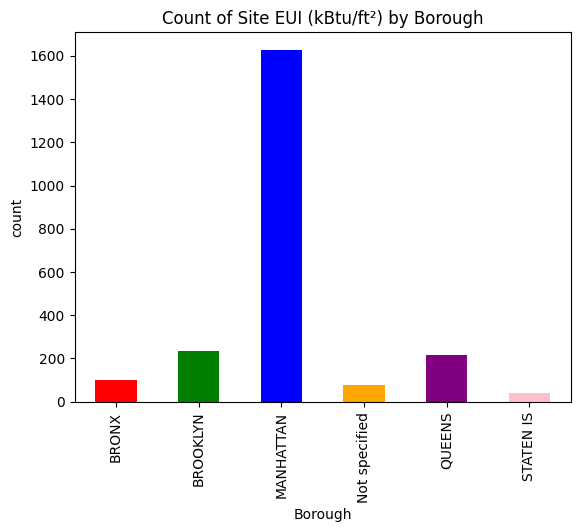

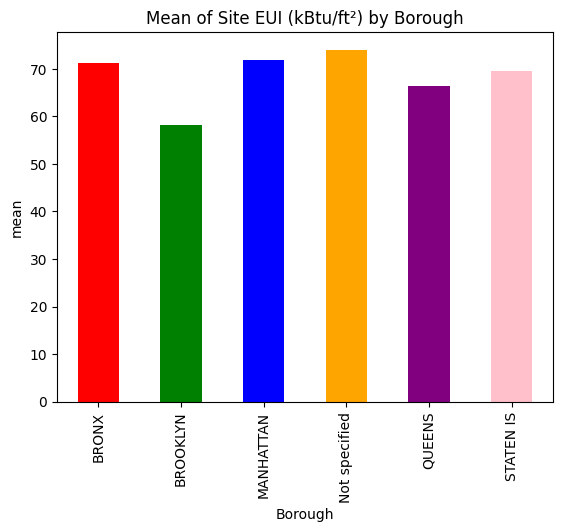

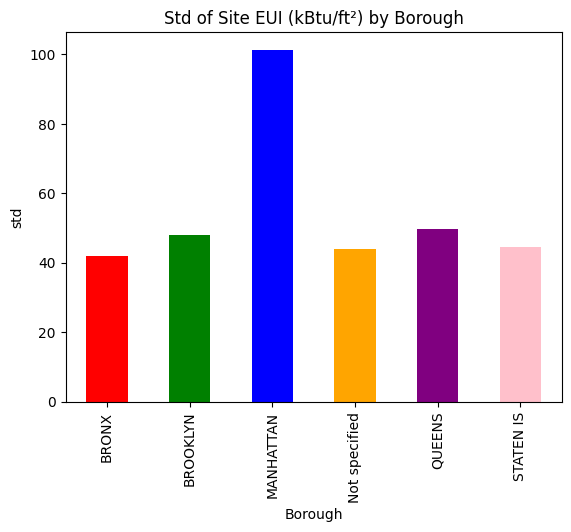

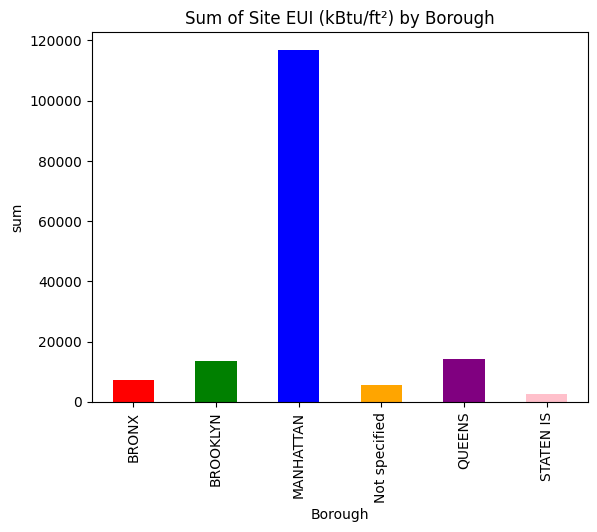

Summary statistics for Site EUI (kBtu/ft²):
               count        mean         std       sum
Borough                                               
BRONX            113   82.915929   54.792028    9369.5
BROOKLYN         254   70.002756   51.043162   17780.7
MANHATTAN       1713   85.160420   51.166520  145879.8
Not specified     90  109.641111  191.689726    9867.7
QUEENS           219   76.241553   51.696669   16696.9
STATEN IS         37   80.875676   52.227874    2992.4


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/4287258589.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/4287258589.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Borough'].fillna('Not specified', inplace=True)


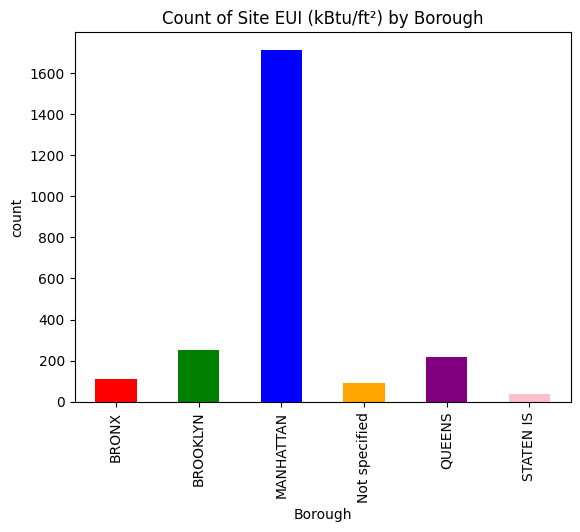

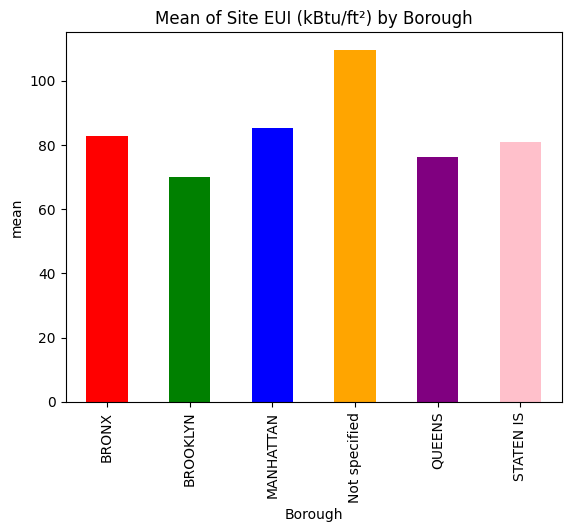

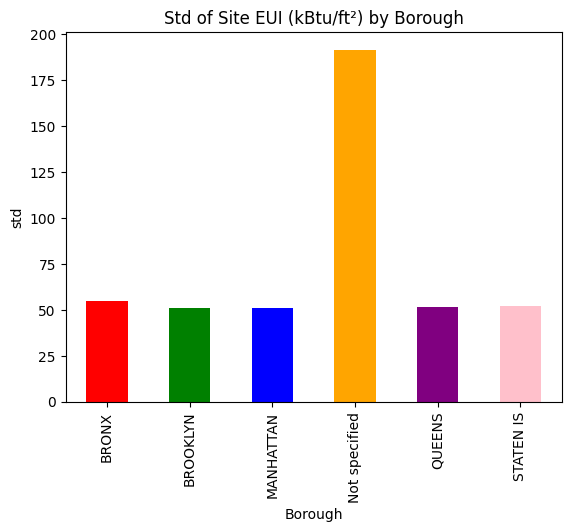

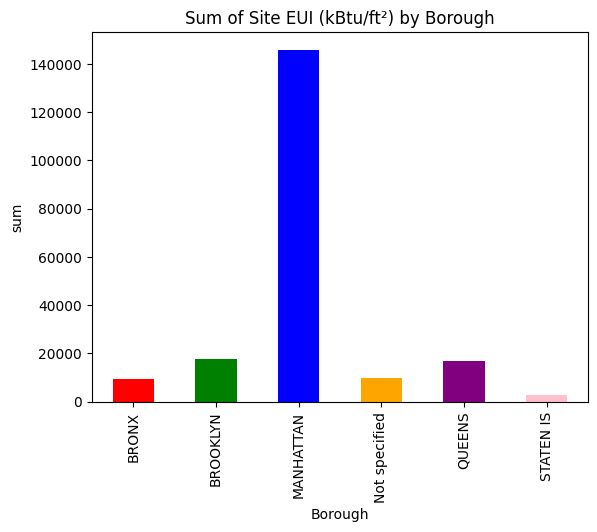

In [ ]:
#####################################
#### Summary of office building data 2019 and 2020 ####
#####################################

summary(office_joined_2020, 'Site EUI (kBtu/ft²)')
summary(office_joined_2019, 'Site EUI (kBtu/ft²)')

In [ ]:
#####################################
#### read and clean monthly data ####
#####################################
ll84_monthly_2020_raw = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2020/Local_Law_84_2021__Monthly_Data_for_Calendar_Year_2020_.csv')
ll84_monthly_2020_raw = ll84_montly_2020_raw.replace('Not Available', None)

ll84_monthly_2019_raw = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/ll84/2019/Local_Law_84_2020__Monthly_Data_for_Calendar_Year_2019_.csv')
ll84_monthly_2019_raw = ll84_monthly_2019_raw.replace('Not Available', None)

# change date format and extract month
ll84_monthly_2020_raw['month'] = pd.to_datetime(ll84_monthly_2020_raw['Month'], format='%b-%y').dt.strftime('%-m')
ll84_monthly_2019_raw['month'] = pd.to_datetime(ll84_monthly_2019_raw['Month'], format='%b-%y').dt.strftime('%-m')
print_df_info(ll84_monthly_2020_raw)
print_df_info(ll84_monthly_2019_raw)

Data shape: (334044, 8)
Data head:
   Property Id Property Name                   Parent Property Id  \
0         7365          1155  Not Applicable: Standalone Property   
1         7365          1155  Not Applicable: Standalone Property   
2         7365          1155  Not Applicable: Standalone Property   
3         7365          1155  Not Applicable: Standalone Property   
4         7365          1155  Not Applicable: Standalone Property   

                  Parent Property Name   Month Electricity Use  (kBtu)  \
0  Not Applicable: Standalone Property  Jan-20               2175731.1   
1  Not Applicable: Standalone Property  Feb-20               1902208.9   
2  Not Applicable: Standalone Property  Mar-20               1847793.7   
3  Not Applicable: Standalone Property  Apr-20               1613573.0   
4  Not Applicable: Standalone Property  May-20               1747078.0   

  Natural Gas Use  (kBtu) month  
0                    None     1  
1                    None     2  
2  

In [ ]:
#####################################
#### Merge monthly data with building info from yearly data for offices ####
#####################################
# change Property ID to numeric
to_numeric(ll84_monthly_2020_raw, 'Property Id')
to_numeric(ll84_monthly_2019_raw, 'Property Id')
to_numeric(office_joined_2020, 'Property Id')
to_numeric(office_joined_2020, 'Property Id')

# merge montly data with yearly on property ID
ll84_monthly_2020 = pd.merge(office_joined_2020, ll84_monthly_2020_raw, how='left', left_on='Property Id', right_on='Property Id')
ll84_monthly_2020 = ll84_monthly_2020.drop_duplicates()
ll84_monthly_2020['month'] = ll84_monthly_2020['month'].astype(int)
#print_df_info(ll84_montly_2020)

ll84_monthly_2019 = pd.merge(office_joined_2019, ll84_monthly_2019_raw, how='left', left_on='Property Id', right_on='Property Id')
ll84_monthly_2019 = ll84_monthly_2019.drop_duplicates()
ll84_monthly_2019['month'] = ll84_monthly_2019['month'].astype(int)
#print_df_info(ll84_montly_2019)

# calculate EUI (kBTU/ft2) by Electricity Use  (kBtu) / Metered Areas (Energy)
to_numeric(ll84_monthly_2020, 'Electricity Use  (kBtu)')
to_numeric(ll84_monthly_2019, 'Electricity Use  (kBtu)')
to_numeric(ll84_monthly_2020, 'Property GFA - Self-Reported (ft²)')
to_numeric(ll84_monthly_2019, 'Property GFA - Self-Reported (ft²)')
ll84_monthly_2020['EUI (kBTU/ft2)'] = ll84_monthly_2020['Electricity Use  (kBtu)']/ll84_monthly_2020['Property GFA - Self-Reported (ft²)']
ll84_monthly_2019['EUI (kBTU/ft2)'] = ll84_monthly_2019['Electricity Use  (kBtu)']/ll84_monthly_2019['Property GFA - Self-Reported (ft²)']

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_93997/4287258589.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce') if pd.notna(x) and x != 'Not Available' else None)


       count      mean       std          sum
month                                        
1       2290  3.659499  3.421999  8380.252533
2       2291  3.445067  3.165752  7892.647921
3       2288  3.282891  3.387394  7511.254518
4       2288  2.812812  3.186815  6435.714613
5       2288  2.982879  3.388966  6824.826904
6       2288  3.323431  3.438557  7604.009753
7       2288  3.876027  3.886337  8868.350731
8       2288  3.873912  3.800251  8863.511465
9       2288  3.343421  3.431106  7649.747856
10      2288  3.125381  3.520038  7150.870688
11      2288  2.928764  3.217942  6701.011293
12      2288  2.993411  3.308331  6848.924336


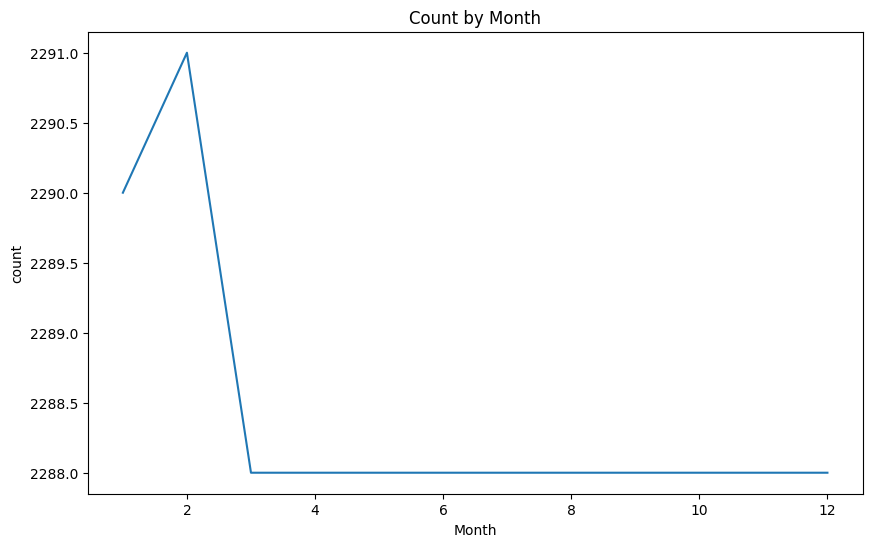

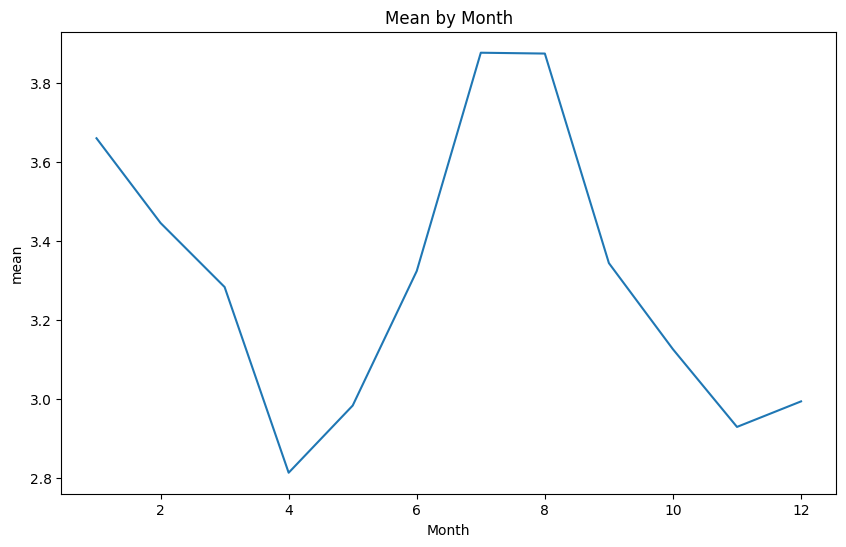

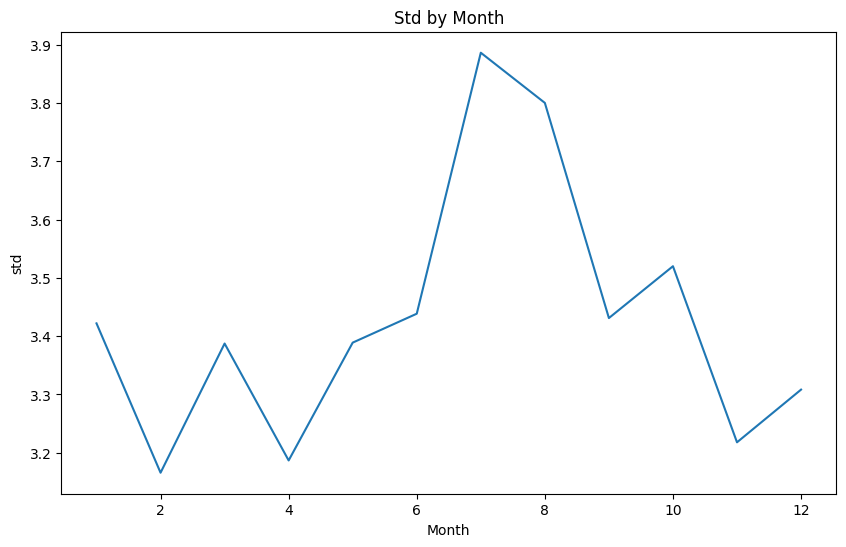

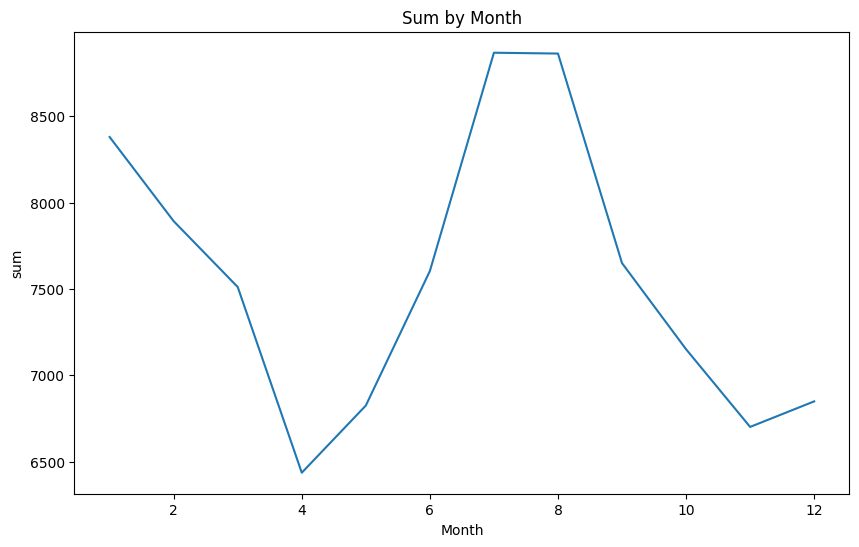

       count      mean       std           sum
month                                         
1       2422  3.883962  2.963857   9406.957087
2       2420  3.568621  2.731604   8636.062513
3       2420  3.819250  2.940493   9242.585648
4       2420  3.548470  2.836909   8587.297715
5       2419  3.850404  3.022658   9314.127347
6       2418  4.305952  3.128440  10411.792505
7       2418  5.006581  3.424934  12105.912151
8       2416  4.798037  3.339380  11592.058078
9       2413  4.155899  3.067005  10028.184507
10      2413  3.755613  2.956432   9062.294812
11      2412  3.503392  2.808007   8450.182539
12      2410  3.578635  2.880914   8624.509512


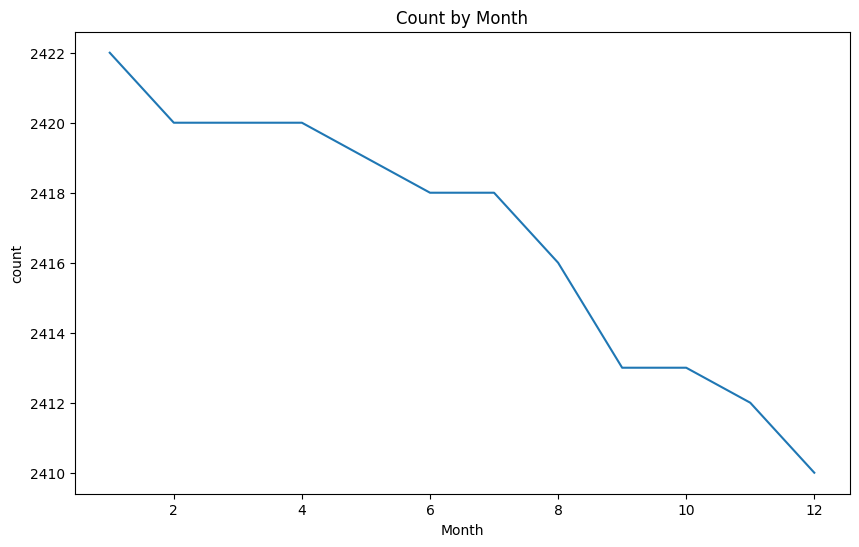

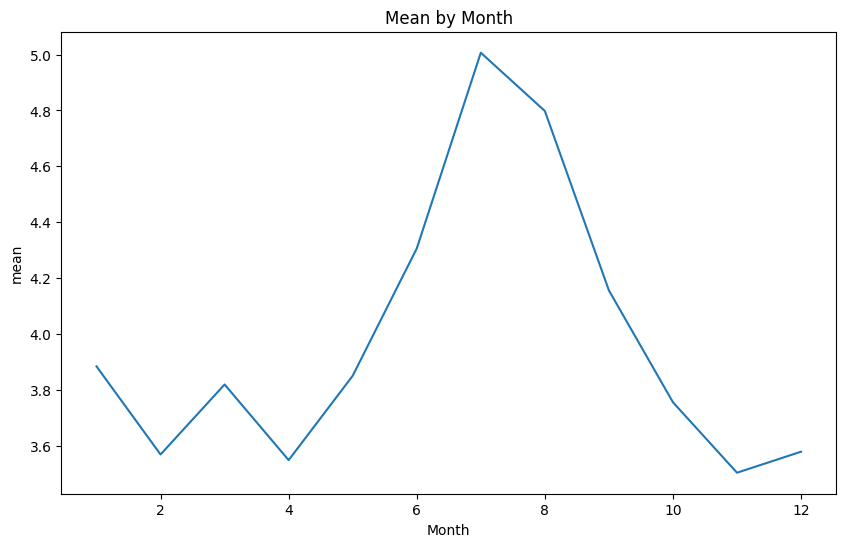

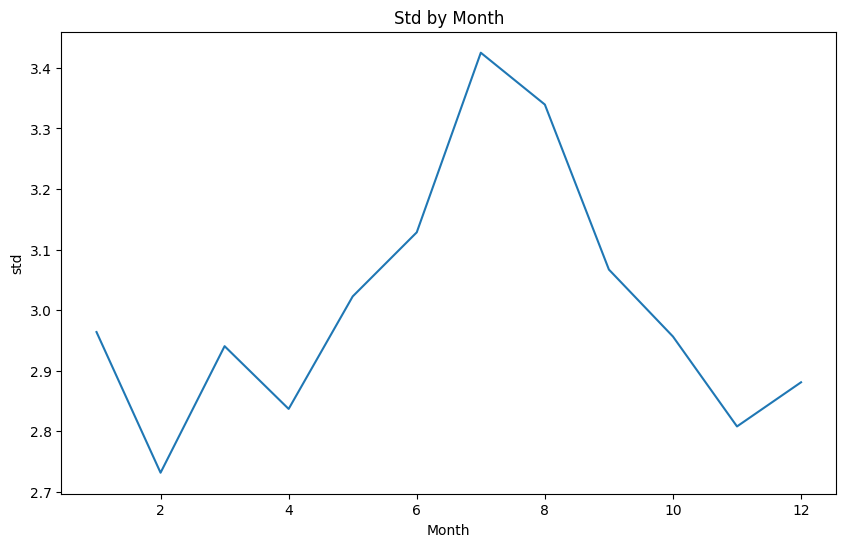

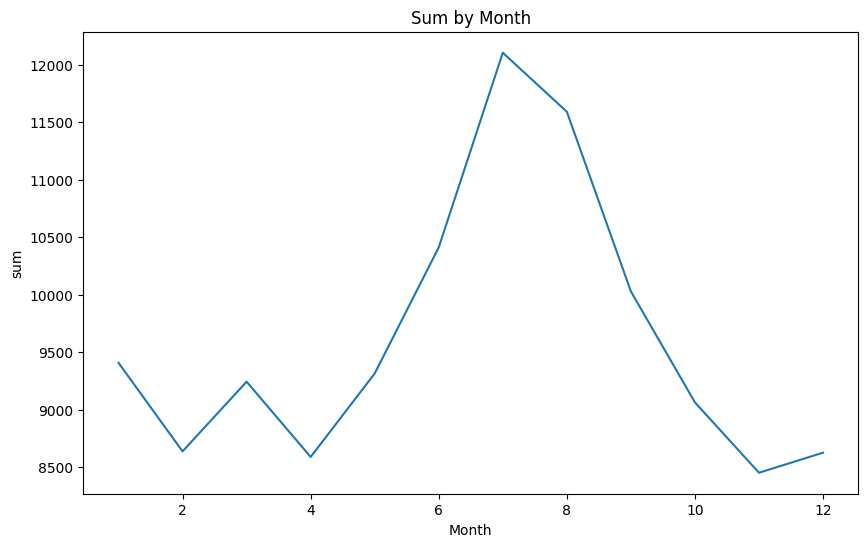

In [ ]:
#####################################
#### Compare montly EUI data ####
#####################################
def summary_month (df, col):
    grouped_data = df.groupby('month')[col].agg(['count', 'mean', 'std', 'sum'])
    print(grouped_data)
    for stat in ['count', 'mean', 'std', 'sum']:
        grouped_data[stat].plot(figsize=(10, 6))
        plt.title(f'{stat.capitalize()} by Month')
        plt.xlabel('Month')
        plt.ylabel(stat)
        plt.show()

summary_month(ll84_monthly_2020, 'EUI (kBTU/ft2)')
summary_month(ll84_monthly_2019, 'EUI (kBTU/ft2)')

In [10]:
#####################################
#### Read and clean Google's mobility data ####
#####################################
all_mobility_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/Google Mobility Data/2020_US_Region_Mobility_Report.csv', na_values='')
all_mobility_2021 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/Google Mobility Data/2021_US_Region_Mobility_Report.csv', na_values='')
all_mobility_2022 = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/Google Mobility Data/2022_US_Region_Mobility_Report.csv', na_values='')
print_df_info(all_mobility_2020)

Data shape: (812065, 15)
Data head:
  country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  US  United States          NaN          NaN         NaN   
1                  US  United States          NaN          NaN         NaN   
2                  US  United States          NaN          NaN         NaN   
3                  US  United States          NaN          NaN         NaN   
4                  US  United States          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-15   
1             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-16   
2             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-17   
3             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-18   
4             NaN               NaN  ChIJCzYy5IS16lQRQrfeQ5K5Oxw  2020-02-19   

   retail_and_

In [26]:

#####################################
#### Separate regions and dates ####
#####################################
# # Filter US data
# us_mobility_2020 = all_mobility_2020.loc[all_mobility_2020['iso_3166_2_code'].isnull()]
# # summary(us_mobility_2020, 'workplaces_percent_change_from_baseline')

# # Filter NY state data
# nys_mobility_2020 = all_mobility_2020.loc[all_mobility_2020['iso_3166_2_code'] == 'US-NY']
# # summary(nys_mobility_2020, 'workplaces_percent_change_from_baseline')

# # Filter NYC 5 boroughs data
# nyc_mobility_2020 = all_mobility_2020.loc[(all_mobility_2020['sub_region_1'] == 'New York') & all_mobility_2020['sub_region_2'].isin(['Bronx County', 'Kings County', 'New York County', 'Queens County', 'Richmond County'])]
# # summary(nyc_mobility_2020, 'workplaces_percent_change_from_baseline')

# # convert date column to datetime and extract month, day
# nyc_mobility_2020['date'] = pd.to_datetime(nyc_mobility_2020['date'])
# nyc_mobility_2020['month'] = nyc_mobility_2020['date'].dt.month
# nyc_mobility_2020['day'] = nyc_mobility_2020['date'].dt.day
# print_df_info(nyc_mobility_2020)

# nyc_mobility_2020.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/Google Mobility Data/nyc_mobility_2020.csv', index=False)

def filter_nyc(all_data, year):
    # Filter NYC 5 boroughs data
    nyc_data = all_data.loc[(all_data['sub_region_1'] == 'New York') & all_data['sub_region_2'].isin(['Bronx County', 'Kings County', 'New York County', 'Queens County', 'Richmond County'])].copy()

    # convert date column to datetime and extract month, day
    nyc_data['date'] = pd.to_datetime(nyc_data['date'])
    nyc_data['year'] = nyc_data['date'].dt.year
    nyc_data['month'] = nyc_data['date'].dt.month
    nyc_data['day'] = nyc_data['date'].dt.day
    # print_df_info(nyc_data)
    return nyc_data
    
nyc_mobility_2020 = filter_nyc (all_mobility_2020, '2020')
nyc_mobility_2021 = filter_nyc (all_mobility_2021, '2021')
nyc_mobility_2022 = filter_nyc (all_mobility_2022, '2022')

#### merge 2020, 2021 and 2022 files

# Concatenate the DataFrames vertically
nyc_mobility = pd.concat([nyc_mobility_2020, nyc_mobility_2021, nyc_mobility_2022], ignore_index=True)

# If the order of the columns is not the same, re-order them
nyc_mobility = nyc_mobility.reindex(columns=nyc_mobility_2020.columns)

# Optionally, reset the index of the merged DataFrame
nyc_mobility.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
print_df_info(nyc_mobility)

nyc_mobility.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/Google Mobility Data/nyc_mobility.csv', index=False)



Data shape: (4870, 18)
Data head:
  country_region_code country_region sub_region_1  sub_region_2  metro_area  \
0                  US  United States     New York  Bronx County         NaN   
1                  US  United States     New York  Bronx County         NaN   
2                  US  United States     New York  Bronx County         NaN   
3                  US  United States     New York  Bronx County         NaN   
4                  US  United States     New York  Bronx County         NaN   

  iso_3166_2_code  census_fips_code                     place_id       date  \
0             NaN           36005.0  ChIJBUEf6ovgwokRwlazSIxIpsk 2020-02-15   
1             NaN           36005.0  ChIJBUEf6ovgwokRwlazSIxIpsk 2020-02-16   
2             NaN           36005.0  ChIJBUEf6ovgwokRwlazSIxIpsk 2020-02-17   
3             NaN           36005.0  ChIJBUEf6ovgwokRwlazSIxIpsk 2020-02-18   
4             NaN           36005.0  ChIJBUEf6ovgwokRwlazSIxIpsk 2020-02-19   

   retail_and_re

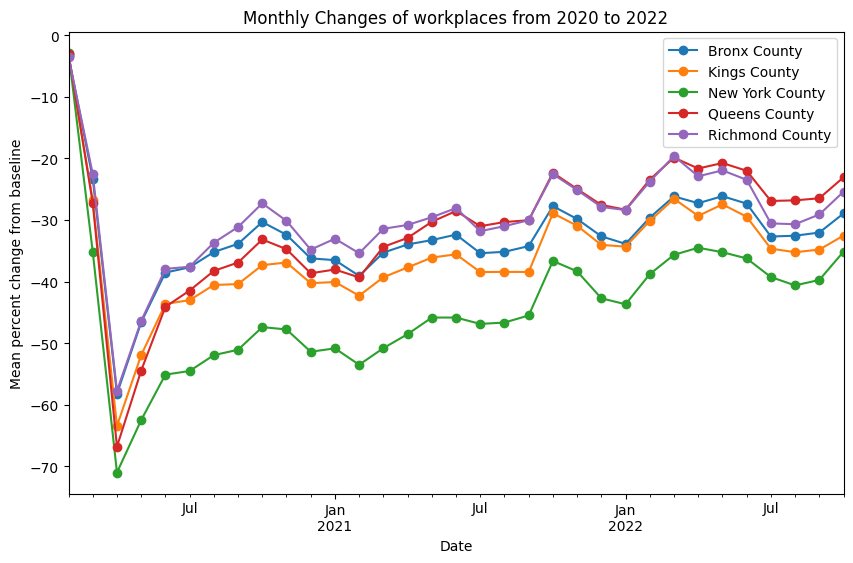

In [39]:
#####################################
#### Compare montly mobility ####
#####################################
def show_mobility_for_place(nyc_mobility, place):
    # Convert 'year' and 'month' columns to datetime
    nyc_mobility['y-m date'] = pd.to_datetime(nyc_mobility['year'].astype(str) + '-' + nyc_mobility['month'].astype(str), format='%Y-%m')
    nyc_mobility.sort_values('y-m date', inplace=True)

    # Group the NYC mobility data by 'sub_region_2' and 'date' and calculate the mean value
    grouped_data = nyc_mobility.groupby(['sub_region_2', 'y-m date'])[place + '_percent_change_from_baseline'].mean().reset_index()

    # Pivot the data to have 'sub_region_2' as columns and 'date' as rows
    pivot_data = grouped_data.pivot(index='y-m date', columns='sub_region_2', values=place + '_percent_change_from_baseline')

    # Plotting the line chart
    pivot_data.plot(kind='line', marker='o', figsize=(10, 6))
    # Set the chart title and labels
    plt.title('Monthly Changes of ' + place + ' from 2020 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Mean percent change from baseline')

    # Show the legend
    plt.legend()

    # Display the line chart
    plt.show()
    
show_mobility_for_place(nyc_mobility, 'workplaces')
show_mobility_for_place(nyc_mobility, 'retail_and_recreation')
show_mobility_for_place(nyc_mobility, 'grocery_and_pharmacy')
show_mobility_for_place(nyc_mobility, 'parks')
show_mobility_for_place(nyc_mobility, 'transit_stations')
show_mobility_for_place(nyc_mobility, 'residential')

In [ ]:
#####################################
#### Correlation between EUI and building factors ####
#####################################
# factors
# Building Square Footage – 'Property GFA - Self-Reported (ft²)' in ll84
# Building Age – 'Year Built' in ll84
# Number of Floors – 'NumFloors' from PLUTO database
# FAR – BUILT FLOOR AREA RATIO (BuiltFAR) from PLUTO database
# Primary Energy Source – a binary variable equal to 1 for the dominant fuel type in the building, and equal to 0 otherwise (new variable)
# % non-Primary Space Type – percentage of non-primary space type (e.g. percentage of retail in a building with a majority office space) (new variable)
# Office Worker Density – Number of employees per 1,000 square feet (default value = 2.3)
# Office Weekly Operating Hours – number of hours per week that a building is occupied by at least 75% of the tenant employees (default value = 65 hours per week)
# etc.